In [8]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap, HeatMapWithTime

# Read the CSV file
df = pd.read_csv('stationary_gps_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H%M%S')

df['time'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()

df['cumulative_distance'] = df['relative_position'].cumsum()

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Create a map centered around the mean coordinates
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=14)

# Add the GPS points to the map
for _, row in gdf.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)

# Show the map
m


In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H%M%S')

df['time'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()
df['cumulative_distance'] = df['relative_position'].cumsum()
from math import radians, sin, cos, sqrt, atan2

# Define the home location as the first GPS point
home_latitude = df['latitude'].iloc[0]
home_longitude = df['longitude'].iloc[0]

# Function to calculate distance between two points using Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371e3  # Earth's radius in meters
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Output distance in meters

# Calculate distance from home for each point
df['distance_from_home'] = df.apply(lambda row: calculate_distance(home_latitude, home_longitude, row['latitude'], row['longitude']), axis=1)

# Calculate the average distance from home
average_distance_from_home = df['distance_from_home'].mean()



# Print the average distance from home
print(f"Average distance from home: {average_distance_from_home} meters")

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Create a map centered around the mean coordinates
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=14)


# Create a heatmap from the points
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
# Add a circle to the map to represent the average distance from home
folium.Circle(location=[home_latitude, home_longitude], radius=average_distance_from_home, color='blue', fill=True, fill_color='blue').add_to(m)
# Display the map
m

Average distance from home: 95.28886339191995 meters


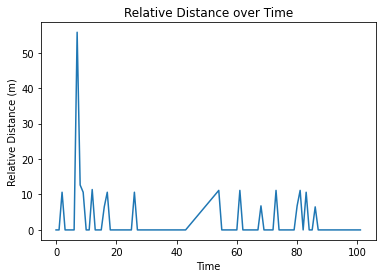

In [10]:
plt.plot(df['time'], df['relative_position'])
plt.xlabel('Time')
plt.ylabel('Relative Distance (m)')
plt.title('Relative Distance over Time')
plt.show()


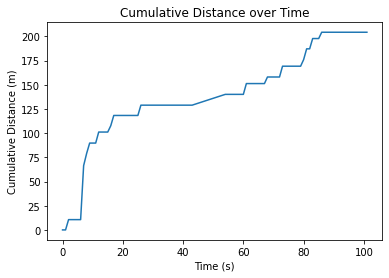

In [11]:
plt.plot(df['time'], df['cumulative_distance'])
plt.xlabel('Time (s)')
plt.ylabel('Cumulative Distance (m)')
plt.title('Cumulative Distance over Time')
plt.show()


In [12]:

# Read the CSV file
df = pd.read_csv('department_gps_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H%M%S')

df['time'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()

df['cumulative_distance'] = df['relative_position'].cumsum()


# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Create a map centered around the mean coordinates
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=14)

# Add the GPS points to the map
for _, row in gdf.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)

# Show the map
m

In [18]:

# Read the CSV file
df = pd.read_csv('department_gps_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H%M%S')

df['time'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()
df['cumulative_distance'] = df['relative_position'].cumsum()
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H%M%S')

df['time'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()
df['cumulative_distance'] = df['relative_position'].cumsum()
from math import radians, sin, cos, sqrt, atan2

# Define the home location as the first GPS point
home_latitude = df['latitude'].iloc[0]
home_longitude = df['longitude'].iloc[0]

# Function to calculate distance between two points using Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371e3  # Earth's radius in meters
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Output distance in meters

# Calculate distance from home for each point
df['distance_from_home'] = df.apply(lambda row: calculate_distance(home_latitude, home_longitude, row['latitude'], row['longitude']), axis=1)

# Calculate the average distance from home
average_distance_from_home = df['distance_from_home'].mean()
df = df.sort_values('timestamp')



# Print the average distance from home
print(f"Average distance from home: {average_distance_from_home} meters")
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Create a map centered around the mean coordinates
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=14)


# Create a heatmap from the points
# Group data by timestamp and create a list of coordinates for each group
heat_data = []
for time in df['timestamp'].unique():
    time_data = df[df['timestamp'] <= time]
    heat_data.append([[row['latitude'], row['longitude']] for index, row in time_data.iterrows()])

HeatMapWithTime(heat_data, auto_play=True, max_opacity=0.8).add_to(m)
#folium.Circle(location=[home_latitude, home_longitude], radius=average_distance_from_home, color='blue', fill=True, fill_color='blue').add_to(m)

# Display the map
m


Average distance from home: 53.12167586210675 meters


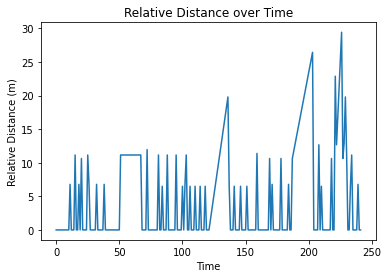

In [14]:
plt.plot(df['time'], df['relative_position'])
plt.xlabel('Time')
plt.ylabel('Relative Distance (m)')
plt.title('Relative Distance over Time')
plt.show()


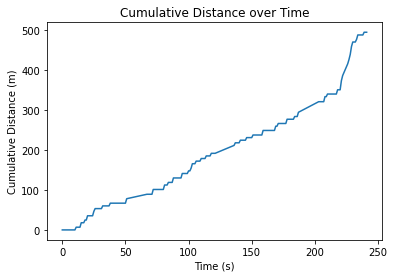

Real Distance: 327.55 m
GPS Distance: 494.423042 m


In [15]:
plt.plot(df['time'], df['cumulative_distance'])
plt.xlabel('Time (s)')
plt.ylabel('Cumulative Distance (m)')
plt.title('Cumulative Distance over Time')
plt.show()

real_distance = 327.55
gps_final_distance = df['cumulative_distance'].iloc[-1]

print(f"Real Distance: {real_distance} m")
print(f"GPS Distance: {gps_final_distance} m")

